## Radiative friction force
2D simulations of electron motion in a strong magnetic field
***

#### 1- What is a strong field in Quantum Electrodynamics (QED)?

To quantify how strong is a field in QED, we define the Schwinger field $B_S$. Above this amplitude, the field  is large enough to create electron-positron pairs from vacuum.
\begin{equation*}
B_S = \frac{m^2c^2}{\hbar e}\sim 10^9 \, \rm T \, \rm (Tesla)
\end{equation*}
It is impossible to produce magnetic fields with such amplitude with conventional methods. However, it is possible to achieve using relativistic particles. For an electron of kinetic energy $(\gamma-1) mc^2$ (where $\gamma$ is the Lorentz factor), the field amplitude in the rest-frame of the electron is boosted by a factor $\gamma$. It is thus convenient to define the quantum parameter of an electron, denoted $\chi$
\begin{equation*}
\chi = \frac{\gamma B}{B_S}
\end{equation*}
where $\gamma B$ is the magnetic field in the rest-frame of the electron, and $B_S$ the Schwinger field.
There are two regimes to consider:
- $\chi \lesssim 0.1 $: the field is weak and electrons radiate x-ray photons in the classical regime
- $\chi \gtrsim 0.1 $: the field is strong and electrons radiate $\gamma$-rays that can decay into electron-positron pairs

We will restrict our analysis to the first case of weak field, namely $\chi \lesssim 0.1$.

#### 2- Electron dynamics in a strong magnetic field

We consider a simple problem with two elements
- a single electron with an initial velocity $\vec{v}_0$ and initial Lorentz factor $\gamma_0$
- the electron propagates in a perpendicular magnetic field of amplitude $B$

Let's first recall what happens when the magnetic field is weak, namely $\chi \ll 1$. The electron experiences only the Lorentz force denoted $\vec{F}$. It can be expressed as $\vec{F}=-e\vec{v}\times \vec{B}$. The electron has a circular trajectory with a radius $r=\gamma mc/(eB)$ (Larmor radius), see Figure (a).

<img src="radiative_friction_force.png"  style="width: 900px; float: left;" />

If the magnetic field amplitude becomes large enough, for instance $\chi \lesssim 0.1 $, the electron is strongly deflected and therefore radiates x-ray photons. This emission is known as Synchrotron radiation, see Figure (b). The radiation emitted has a back-reaction on the electron trajectory. It slows down the electron, and it is possible to quantify this process by a radiative friction force denoted $\vec{F}_r$
\begin{equation*}
\vec{F}_r = -k \chi^2 \vec{v}
\end{equation*}
We can note several things on this expression:
- the factor $k$ is a constant, defined as $k=2m^2c^2\alpha_f/\hbar$
- $F_r$ is proportional to $\chi^2$, this means that the stronger the field, the higher the amplitude of the force
- the direction is $-\vec{v}$, opposite to the velocity of the electron, the force slows down the electron
- this expression is an approximation valid in the classical limit $\chi \lesssim 0.1 $.

This force is represented in Figure (b). It modifies the circular trajectory of the electron identified in Fgiure (a). 
We are going to use numerical simulation to explore the dynamics of the electron in a strong field. In the equation of motion, we have two forces, the Lorentz force $\vec{F}$ and the radiative friction force $\vec{F}_r$
\begin{equation*}
\frac{d \vec{p}}{dt} = \vec{F} + \vec{F}_{\mathcal{r}} = -e \vec{v} \times \vec{B} - k \chi^2 \vec{v}
\end{equation*}
We resort to numerical simulation, but theoretical solution to this problem exist.

#### 3- Simulation of electron motion in a strong $B$ field $\chi \lesssim 0.1$

Run the next cell to initialise the simulation.
In this cell, we set up two important physical quantitites: the inital momentum of the electron, denoted ufl and the initial magnetic field, denoted B.

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

# Get ZPIC 2D with radiative friction force
import em2d_rr as zpic
import numpy as np

# Time step
dt = 0.01

# Simulation time
tmax = 4*2.*np.pi

# Number of cells
nx  = [300,300]

# Simulation box size
box = [6,6]

## Plasma slab
# Particles per cell
ppc = [4,4]

# Define a custom density profile
def custom_xn0(x):
    if (x>2.9 and x<3.1):
        return 1.0
    else:
        return 0.0

def custom_yn0(y):
    if (y>0.0 and y<0.1):
        return 1.0
    else:
        return 0.0

# Use the custom density profile
dens = zpic.Density(type = "custom", custom_x = custom_xn0, custom_y = custom_yn0 )

# Set up a super low density to avoid any plasma effects
dens.n=1e-8

# Initial momentum of the electron
ufl=100.

# Initial Lorentz factor of the electron
gamma0 = np.sqrt(1.+ufl**2)

# Create the species
electrons = zpic.Species( "electrons", m_q=-1,ppc= ppc,
                           density = dens,ufl=[ufl,0,0])

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = (electrons) )

# Set the sorting period to 0 in order to track the particle's trajectories 
electrons.n_sort=0

# Setup the external fields (Remember B is perpendicular to the simulation plane)
B=[0,0,50]
ext = zpic.ExternalField(B_type = 'uniform', B_0 = B)
sim.emf.set_ext_fld( ext )

Question 1: Read carefully the cell above. What is the initial momentum of the electron? (Erase the wrong answers)
- $\vec{p}=(100,0,0)$
- $\vec{p}=(0,100,0)$
- $\vec{p}=(0,0,100)$

Question 2: What is the initial magnetic field? (Erase the wrong answers)
- $\vec{B}=(0,0,25)$
- $\vec{B}=(0,25,0)$
- $\vec{B}=(25,0,0)$

Execute the next cell to run the simulation

In [2]:
# Arrays to store the particles trajectories
ele_part_rep =[]

# Here, we run the simulation and store the trajectory
while sim.t < tmax:
    
    # Print advance
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    
    #store the electron trajectories
    ele_part_rep.append(electrons.particles[10].copy())

    # Run one time step
    sim.iter()

Run the next cell to format the electron trajectory into a python array

In [3]:
# Convert trajectories to position arrays
e_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in ele_part_rep]
e_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in ele_part_rep]

# Extract the energy of particles from the trajectories
e_gamma_t = [np.sqrt(1.0+i['ux']**2+i['uy']**2+i['uz']**2) for i in ele_part_rep]

# Create time array
t=np.linspace(0,sim.t,sim.n)

#### 4- Plot and Analyse the electron trajectory

Run the next cell to plot the trajectory of the electron in the strong magnetic field

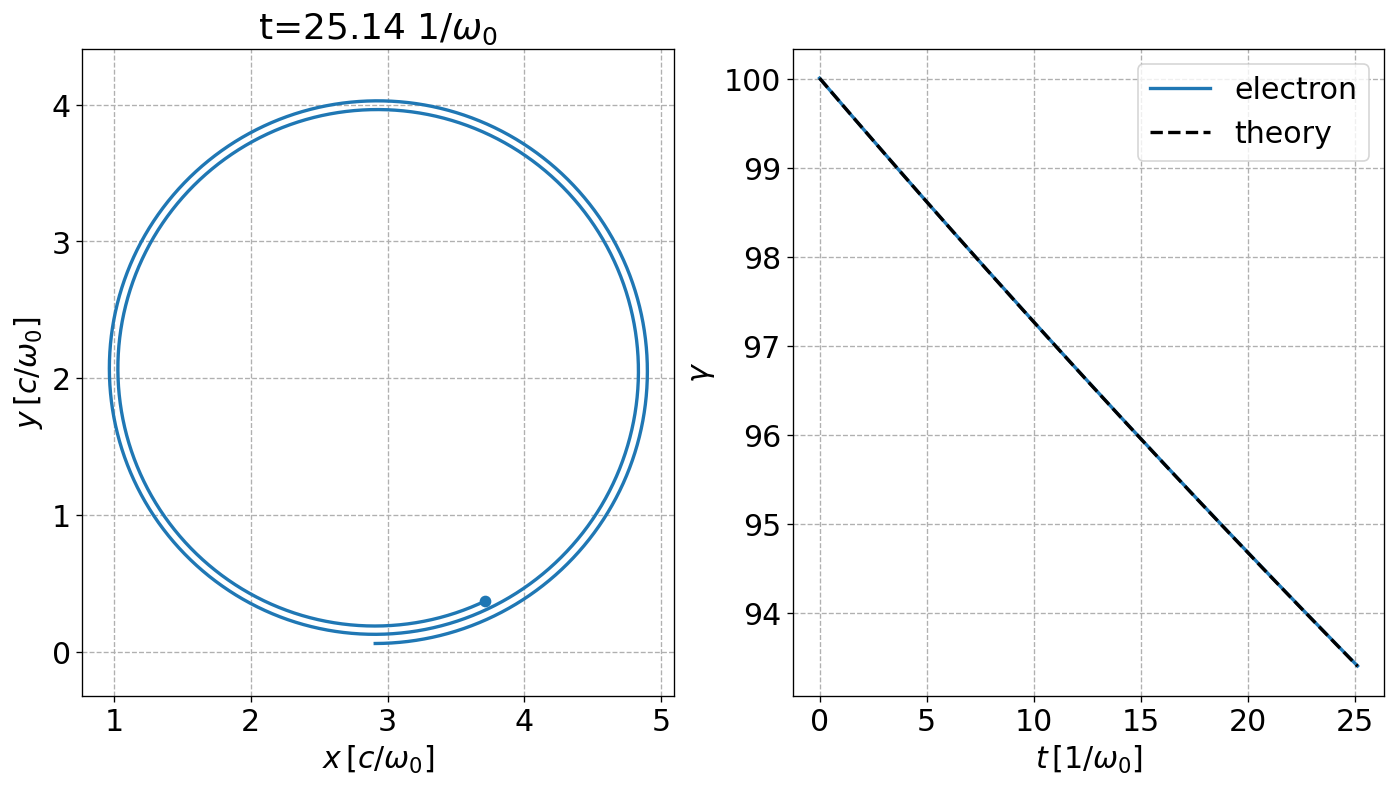

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# Define a function that returns the theoretical energy loss
def solution(gamma0, B, t):
    ini = (gamma0 - 1.) / (gamma0 + 1.)
    k_damp = 1.1237684e-8
    tmp = -2. * k_damp * B**2 * t
    return (1. + ini * np.exp(-2. * k_damp * B**2 * t)) / (1. - ini * np.exp(-2. * k_damp * B**2 * t))

# Set up the plot
fig, ax=plt.subplots(1, 2, figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})

## Left part: xy trajectories

# Electron trajectory
ax[0].plot(e_posx_t,e_posy_t,lw=2)
ax[0].scatter(e_posx_t[-1],e_posy_t[-1])

## Right part: evolution of energy
ax[1].plot(t,e_gamma_t,lw=2,label="electron")
ax[1].plot(t,solution(gamma0, B[2], t),lw=2,label="theory", c='k', ls='--')

# Setup labels, grids, and others
ax[0].grid(True,ls="--")
ax[0].set_xlabel(r'$x\,[c / \omega_0]$')
ax[0].set_ylabel(r'$y\,[c / \omega_0]$')
ax[0].set_aspect('equal', 'datalim')
ax[0].set_title(r't={:.2f} $1 / \omega_0$'.format(sim.t))

ax[1].grid(True,ls="--")
ax[1].set_xlabel(r'$t \, [1 / \omega_0]$')
ax[1].set_ylabel(r'$\gamma$')
#ax[1].set_ylim([0.0, gamma0*1.1])
ax[1].legend()

plt.show()

Question 3: What can you observe about the electron energy during the simulation? We recall that the kinetic energy of an electron is given by $(\gamma-1)mc^2$. (Erase the wrong answers)
- The energy of the electron increases over time
- The energy of the electron decreases over time

Question 4 (more open): Can you explain why the energy of the electron is not constant? 

#### 5- Practise

Try first to increase the amplitude of the magnetic field from $B=(0,0,50)$ to $B=(0,0,100)$.

Plot the electron trajectory and explore the physics!